🔧 1. Imports and Setup

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


📥 2. Load the Data

In [10]:
df = pd.read_csv("E:/FoodieBay DataSet/data/foodiebay_cleaned.csv")  # Use your cleaned CSV or pass it from EDA
df.head()


,location,rest_type,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,votes,ave_review_ranking,rate,...,primary_cuisine_Fast Food,primary_cuisine_Healthy Food,primary_cuisine_Italian,primary_cuisine_Kerala,primary_cuisine_North Indian,primary_cuisine_Other,primary_cuisine_Pizza,primary_cuisine_Seafood,primary_cuisine_South Indian,primary_cuisine_Street Food
0,3,1,1,12,0,0,700.0,13,4.75,3.6,...,0,0,0,0,0,0,0,0,0,0
1,41,5,4,17,1,0,400.0,28,4.50,3.8,...,0,0,0,0,0,0,0,0,0,0
2,4,5,2,13,1,0,200.0,18,4.00,3.9,...,0,0,0,0,0,0,0,0,1,0
3,78,2,2,5,1,1,1200.0,550,4.80,4.3,...,0,0,0,0,0,0,0,0,0,0
4,60,1,4,24,1,0,250.0,67,3.00,3.7,...,0,0,0,0,0,0,0,0,0,0


🧹 3. Preprocessing Setup
Separate features and target:

In [11]:
X = df.drop(["rate"], axis=1)
y = df["rate"]


Identify column types:

In [12]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "bool"]).columns.tolist()


Build a preprocessor pipeline:

In [13]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])


🔄 4. Train/Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


🔁 5. Model Pipelines

In [15]:
# Linear Regression Pipeline
lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Random Forest Pipeline
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])


🚂 6. Model Training

In [16]:
# Linear Regression
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# Random Forest
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)


📊 7. Model Evaluation

In [17]:
# Linear Regression
print("Linear Regression Results:")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# Random Forest
print("\nRandom Forest Results:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Linear Regression Results:
R2 Score: 0.38957669088872904
RMSE: 0.2968456018584102

Random Forest Results:
R2 Score: 0.8969493750245738
RMSE: 0.1219664488744599


📈 8. Feature Importance (Optional – for Random Forest only)

In [ ]:
# After fitting the pipeline
rf_pipeline.fit(X_train, y_train)

# Get all transformed feature names directly from the pipeline
feature_names = rf_pipeline.named_steps["preprocessor"].get_feature_names_out()

# Combine with regressor feature importances
rf_model = rf_pipeline.named_steps["regressor"]
importances = rf_model.feature_importances_

# Build importance DataFrame
import pandas as pd
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print(feat_imp.head(20))



                              Feature  Importance
7                          num__votes    0.449097
8             num__ave_review_ranking    0.280690
6               num__ave_cost_for_two    0.059895
0                       num__location    0.059069
3                 num__listed_in_city    0.023674
1                      num__rest_type    0.020404
9                num__menu_item_count    0.017326
4                   num__online_order    0.015843
24  num__primary_cuisine_North Indian    0.010246
25         num__primary_cuisine_Other    0.006485
5                     num__book_table    0.006387
17       num__primary_cuisine_Chinese    0.005724
14       num__primary_cuisine_Biryani    0.005161
28  num__primary_cuisine_South Indian    0.004932
16          num__primary_cuisine_Cafe    0.004471
2                 num__listed_in_type    0.003521
26         num__primary_cuisine_Pizza    0.003415
20     num__primary_cuisine_Fast Food    0.003343
22       num__primary_cuisine_Italian    0.002911


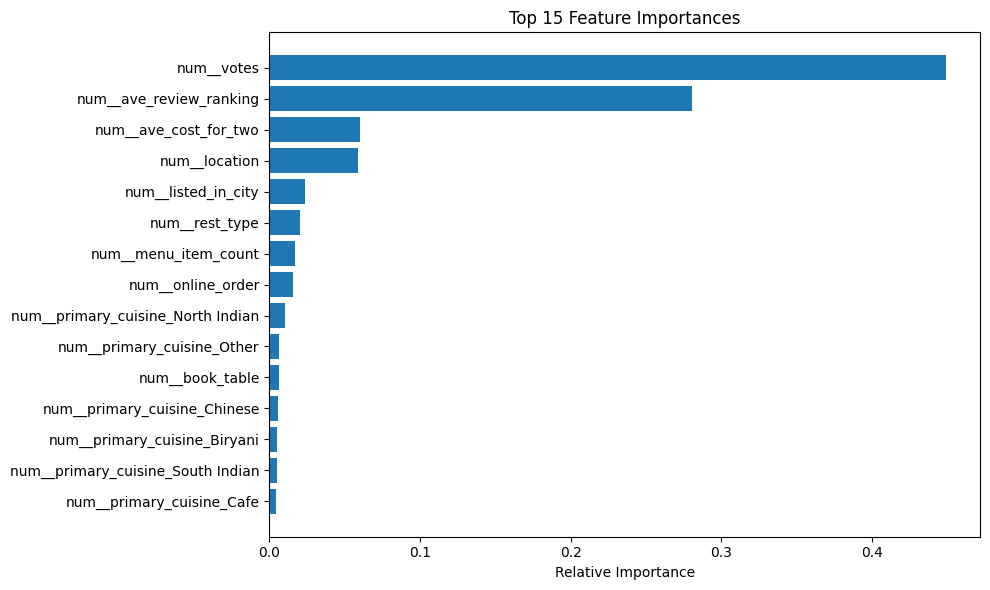

In [21]:
# Fit the pipeline
rf_pipeline.fit(X_train, y_train)

# Get feature names after preprocessing
feature_names = rf_pipeline.named_steps["preprocessor"].get_feature_names_out()

# Get feature importances from RF model
rf_model = rf_pipeline.named_steps["regressor"]
importances = rf_model.feature_importances_

# Put into a dataframe
import pandas as pd
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

# --- Plot Top 15 ---
top_n = 15
indices = feat_imp["Importance"].argsort().iloc[-top_n:]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances")
plt.barh(feat_imp["Feature"].iloc[indices], feat_imp["Importance"].iloc[indices], align='center')
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()


 Add GridSearchCV for Random Forest Hyperparameter tuning

In [22]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

# Use the same pipeline with 'regressor' being a RandomForest
grid_rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

# Setup GridSearch
grid_search = GridSearchCV(grid_rf_pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best parameters found:", grid_search.best_params_)

# Evaluate
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

print("Tuned Random Forest R2 Score:", r2_score(y_test, y_pred_best))
print("Tuned Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters found: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Tuned Random Forest R2 Score: 0.898140671511341
Tuned Random Forest RMSE: 0.12125941497823754


In [23]:
import pickle

# Save the tuned Random Forest pipeline
with open("E:/FoodieBay DataSet/models/random_forest_model.pkl", "wb") as f:
    pickle.dump(best_rf_model, f)